In [1]:
!pip install numpy pandas scikit-learn

In [2]:
import pandas as pd
import numpy as np

# Explorando os Arquivos


## Arquivo de Treino

In [3]:
df_train = pd.read_csv("train.tsv", sep='\t')
df_train.head()

,client_id,path,sentence,up_votes,down_votes,age,gender,accents,locale,segment
0,4225d310188cfd17c5901d29ca5d9685eac936287ed275...,common_voice_en_28449980.mp3,Thereafter the class was highly respected.,2,0,NaN,NaN,NaN,en,NaN
1,4225d310188cfd17c5901d29ca5d9685eac936287ed275...,common_voice_en_28449981.mp3,Banaras Hindu University is a Central Universi...,2,0,NaN,NaN,NaN,en,NaN
2,4225d310188cfd17c5901d29ca5d9685eac936287ed275...,common_voice_en_28449984.mp3,"On display are home furnishings, pioneer tools...",2,0,NaN,NaN,NaN,en,NaN
3,4225d310188cfd17c5901d29ca5d9685eac936287ed275...,common_voice_en_28449986.mp3,Eleva and Strum each house an elementary school.,2,1,NaN,NaN,NaN,en,NaN
4,425089f4d7e24cdf6861d0130323ec2e41bfc19e35bce5...,common_voice_en_20293200.mp3,The eastern portion of the county lies within ...,2,0,NaN,NaN,NaN,en,NaN


In [4]:
df_train["age"].unique()

array([nan, 'twenties', 'fourties', 'thirties', 'fifties', 'sixties',
       'teens', 'seventies', 'eighties', 'nineties'], dtype=object)

In [5]:
len(df_train["age"])

864448

In [6]:
df_train["gender"].unique()

array([nan, 'male', 'other', 'female'], dtype=object)

In [7]:
df_train[ df_train["gender"] == 'male' ].head()

,client_id,path,sentence,up_votes,down_votes,age,gender,accents,locale,segment
16,429678b0833edff53f4e34e0f75c397a168b607a8bd116...,common_voice_en_23612263.mp3,"The town features a curling rink, arena, outdo...",2,0,twenties,male,NaN,en,NaN
17,429678b0833edff53f4e34e0f75c397a168b607a8bd116...,common_voice_en_23612304.mp3,Arsenal: contemporary art exhibitions.,2,0,twenties,male,NaN,en,NaN
18,429678b0833edff53f4e34e0f75c397a168b607a8bd116...,common_voice_en_23612306.mp3,In a Number of Letters from the Federal Farmer...,2,0,twenties,male,NaN,en,NaN
19,429678b0833edff53f4e34e0f75c397a168b607a8bd116...,common_voice_en_23612307.mp3,"The movie ""Owning Mahowny"" was based on Ross's...",2,1,twenties,male,NaN,en,NaN
24,42b4b33626b4173347210d0959772ef2ee1a58b27a6b0a...,common_voice_en_27703525.mp3,"James also has three sisters Annabelle, Susann...",2,0,fourties,male,NaN,en,NaN


In [8]:

df_train = df_train[df_train['age'].notna()]

In [9]:
df_train = df_train[df_train['gender'].notna()]

In [10]:
df_train = df_train[df_train['gender'] != 'other']
df_train = df_train[df_train['down_votes'] == 0]

In [11]:
df_train['gender'].unique()

array(['male', 'female'], dtype=object)

In [12]:
df_train['age'].unique()

array(['twenties', 'fourties', 'thirties', 'fifties', 'sixties', 'teens',
       'seventies', 'eighties', 'nineties'], dtype=object)

In [13]:
clients_train = df_train['client_id']

In [14]:
df1 = df_train.groupby(['client_id'])

In [15]:
len(df1)

10665

In [16]:
df1 = df1.count()[ df1.count()['path'] >= 5 ]

In [17]:
df1.index

Index(['00015e9c3555dafee96d32f38408877b6c33cc7668c5c75206317e926702b5b64accf29bf8456f9a09efa720bc42b8cd4589e5abc289ce6e2fb96050433c0c93',
       '00143475c51f0cc41c344019a368e509aa933b8767de7ea418ce5c5a1be139a8f44f3877ae714a66d5c754443ed3e0be65c3832891923ce957624afdf1e64df5',
       '0014a05b7983f18441b13ce4e4949b6d5d93ffabc11009b3808e9823f0e0ac52d1616f1d029a69581bb57dc83084d9f0edd9761948b4648ecf67d0647bda11e8',
       '002cb63172ebb1a9e9865419d7beae44f3d3729c9582f105bf24ba3c9e2caad2d34199e20703a4c84e4be8dd04df3f18fa654e23d8b4ec91a70caccbb266b35f',
       '00309ae51fe07824676d5a3b39837b0a8927c064b7a054f3083f6f9cf7741987f8c92cb60c4c93e86a4e1be11dad46b92285584802bbe6a0fd618ca0f44b2959',
       '005805ffffabbba8fa7dc8f6093bc07716b1b7cd2cf36d081c40825cfb1908cdb57eef584bbc52534d4ecf7c218be8f68e6493744e6fe27ddd638731b125f3a3',
       '005aedea765fac477a621d785d4f76a3c2590dd58f0fba0ad2ab2900fc67c439987cb60c79e06c51b6ff13c219648765fb92e076896d118461841553d44d7556',
       '005ce52c025b621f794

In [18]:
list(df1.index)

['00015e9c3555dafee96d32f38408877b6c33cc7668c5c75206317e926702b5b64accf29bf8456f9a09efa720bc42b8cd4589e5abc289ce6e2fb96050433c0c93',
 '00143475c51f0cc41c344019a368e509aa933b8767de7ea418ce5c5a1be139a8f44f3877ae714a66d5c754443ed3e0be65c3832891923ce957624afdf1e64df5',
 '0014a05b7983f18441b13ce4e4949b6d5d93ffabc11009b3808e9823f0e0ac52d1616f1d029a69581bb57dc83084d9f0edd9761948b4648ecf67d0647bda11e8',
 '002cb63172ebb1a9e9865419d7beae44f3d3729c9582f105bf24ba3c9e2caad2d34199e20703a4c84e4be8dd04df3f18fa654e23d8b4ec91a70caccbb266b35f',
 '00309ae51fe07824676d5a3b39837b0a8927c064b7a054f3083f6f9cf7741987f8c92cb60c4c93e86a4e1be11dad46b92285584802bbe6a0fd618ca0f44b2959',
 '005805ffffabbba8fa7dc8f6093bc07716b1b7cd2cf36d081c40825cfb1908cdb57eef584bbc52534d4ecf7c218be8f68e6493744e6fe27ddd638731b125f3a3',
 '005aedea765fac477a621d785d4f76a3c2590dd58f0fba0ad2ab2900fc67c439987cb60c79e06c51b6ff13c219648765fb92e076896d118461841553d44d7556',
 '005ce52c025b621f7942751c3dd418f0e7d1e9f55b54278d16c3b853e2a8af97718

In [19]:
primeira_voz = df_train[ df_train['client_id'] == '017456594cc288f725d151b6c791125509ebf323bef357d8e2a6faeda4d329ca50e7c90a7432de2796e3accd53a4b9da6e543b087841b30ef63cc0a50954683f' ]

In [20]:
df_train[ df_train['client_id'] == '1d4d7f56b1ed223f6d446372db74f6dd1313d99b84ec708523a0ca0567d93f3dbb5e7b7dd5f507ef656b94531ac7ab397bbdee127d734355175fa61891671e91' ]

,client_id,path,sentence,up_votes,down_votes,age,gender,accents,locale,segment
309308,1d4d7f56b1ed223f6d446372db74f6dd1313d99b84ec70...,common_voice_en_23361314.mp3,It would later become Moffat Station and still...,2,0,twenties,male,Canadian English,en,NaN
309309,1d4d7f56b1ed223f6d446372db74f6dd1313d99b84ec70...,common_voice_en_23361315.mp3,"However, this was surpassed by Ultravox's hit ...",2,0,twenties,male,Canadian English,en,NaN
309310,1d4d7f56b1ed223f6d446372db74f6dd1313d99b84ec70...,common_voice_en_23361316.mp3,Seven of these petroglyphs could be moose.,2,0,twenties,male,Canadian English,en,NaN
309312,1d4d7f56b1ed223f6d446372db74f6dd1313d99b84ec70...,common_voice_en_23361329.mp3,It has the smallest population of any municipa...,2,0,twenties,male,Canadian English,en,NaN
309313,1d4d7f56b1ed223f6d446372db74f6dd1313d99b84ec70...,common_voice_en_23361330.mp3,"If I can play baseball, I know I'm fine.",2,0,twenties,male,Canadian English,en,NaN
...,...,...,...,...,...,...,...,...,...,...
309393,1d4d7f56b1ed223f6d446372db74f6dd1313d99b84ec70...,common_voice_en_23361496.mp3,Poor resettlement planning has led to housing ...,2,0,twenties,male,Canadian English,en,NaN
309394,1d4d7f56b1ed223f6d446372db74f6dd1313d99b84ec70...,common_voice_en_23361497.mp3,She is also said to be wearing a wig for the s...,2,0,twenties,male,Canadian English,en,NaN
309395,1d4d7f56b1ed223f6d446372db74f6dd1313d99b84ec70...,common_voice_en_23361498.mp3,She is Matron of the Women's Environmental Net...,2,0,twenties,male,Canadian English,en,NaN
309398,1d4d7f56b1ed223f6d446372db74f6dd1313d99b84ec70...,common_voice_en_23361501.mp3,The previous building became the administrativ...,2,0,twenties,male,Canadian English,en,NaN


In [21]:
df_train_set = df_train.set_index("client_id")

In [22]:
len(df_train_set)

504874

In [23]:
len(df1.index)

7613

In [24]:
df_tmp = df_train_set.loc[list(df1.index)]

In [25]:
df_tmp.groupby("client_id").count()

,path,sentence,up_votes,down_votes,age,gender,accents,locale,segment
client_id,,,,,,,,,
00015e9c3555dafee96d32f38408877b6c33cc7668c5c75206317e926702b5b64accf29bf8456f9a09efa720bc42b8cd4589e5abc289ce6e2fb96050433c0c93,5,5,5,5,5,5,5,5,0
00143475c51f0cc41c344019a368e509aa933b8767de7ea418ce5c5a1be139a8f44f3877ae714a66d5c754443ed3e0be65c3832891923ce957624afdf1e64df5,18,18,18,18,18,18,18,18,0
0014a05b7983f18441b13ce4e4949b6d5d93ffabc11009b3808e9823f0e0ac52d1616f1d029a69581bb57dc83084d9f0edd9761948b4648ecf67d0647bda11e8,10,10,10,10,10,10,10,10,0
002cb63172ebb1a9e9865419d7beae44f3d3729c9582f105bf24ba3c9e2caad2d34199e20703a4c84e4be8dd04df3f18fa654e23d8b4ec91a70caccbb266b35f,14,14,14,14,14,14,14,14,0
00309ae51fe07824676d5a3b39837b0a8927c064b7a054f3083f6f9cf7741987f8c92cb60c4c93e86a4e1be11dad46b92285584802bbe6a0fd618ca0f44b2959,2907,2907,2907,2907,2907,2907,0,2907,0
...,...,...,...,...,...,...,...,...,...
ffdb6b7c465c2ebf0e8bc36d965ef1c7c207d4d705a1cff484ec43efddeca0c6ea0feb210229e108fc73784be4c01463bacfd9b32cdb91cab10e69fabeeb399a,13,13,13,13,13,13,13,13,0
ffe42ace6c59c49eb8fa47ee7a3434965e16a8da81a4a084a2c35f83ac2153f30915662af26623b24a8ba3e49089565f150e20743017929e034819f7aacfeaea,72,72,72,72,72,72,72,72,0
ffe915567535fdc3050f0b7dc7b530496048b939359643a5612904516d33a9293a47b919576d83a8e4743fab0ec7da2d9d6590111ec31f8b101aad1890d58b0f,9,9,9,9,9,9,9,9,0


In [26]:
df_tmp["down_votes"].unique()

array([0])

In [27]:
df_tmp = df_tmp.drop(["segment", "down_votes", "up_votes", "locale", "accents"], axis=1)

In [28]:
df_tmp.groupby("sentence").count()

,path,age,gender
sentence,,,
"""..but when I said that I could not be a candidate, I mean it!",1,1,1
"""A Bronx Tale"" received positive reviews from critics.",1,1,1
"""A Cuckoo in the Nest"" or ""Rookery Nook"".",1,1,1
"""A Day Before Tomorrow"" is a documentary film about Finnish band Nightwish.",1,1,1
"""A Different Kind of Pain"" received mixed reviews.",1,1,1
...,...,...,...
"“You’re too blessed superior for anything,” he said.",1,1,1
"“You’ve never tried,” she answered.",1,1,1
"“‘Monsieur,’” he began; then he looked in great confusion at Mr. Jordan.",1,1,1


In [29]:
df_tmp["sentence"].value_counts()

Kira later apologises to Sisko, and agrees with his earlier sentiment about Winn's actions.     1
Hill went on to win the championship, the first American to do so.                              1
Mitchell has four children with his wife Monica.                                                1
He was one of the most widely known contemporary Hungarian and Central European writers.        1
The fourth star was initially a guest star.                                                     1
                                                                                               ..
Exogenous, meaning "outside the body", may also be referred to as "dietary" or "pre-formed".    1
In their qualification heat they were disqualified and eliminated.                              1
Inspired by bands like Cream, he then took drum classes.                                        1
The white horizontal stripes also represent markings on a surveyor's measuring staff.           1
Mr. Earnshaw invited

In [30]:
df_tmp["sentence"].value_counts().unique()

array([1])

# Pegando Samples de Audio

- Pegando os audios de primeira_voz e colocando em outra pasta.

In [31]:
primeira_voz[['path', 'sentence']]

,path,sentence
108745,common_voice_en_198679.mp3,A toddler with a Texas university jersey wears...
108746,common_voice_en_198680.mp3,Red objects fall on men standing behind a red ...
108747,common_voice_en_198681.mp3,A man is being suspended in some sort of contr...
108749,common_voice_en_198683.mp3,A group of men performing as a band outside of...
108751,common_voice_en_198685.mp3,A man woman and little boy sitting in a meadow.
108752,common_voice_en_198686.mp3,"A man performs in an outdoor space, with a lot..."
108753,common_voice_en_198687.mp3,Young boy plays ball on the beach.
108754,common_voice_en_198689.mp3,A dog above snow.
108755,common_voice_en_198690.mp3,Rodeo rider on charging bull.
108757,common_voice_en_198692.mp3,A couple is married in a church as guests look...


In [32]:
import shutil

#shutil.copyfile(src, dst)

In [33]:
caminhos = primeira_voz['path']
for c in caminhos:
    print("Copiando o arquivo ", c)
    shutil.copyfile("clips/"+c, "samples/"+c)

Copiando o arquivo  common_voice_en_198679.mp3
Copiando o arquivo  common_voice_en_198680.mp3
Copiando o arquivo  common_voice_en_198681.mp3
Copiando o arquivo  common_voice_en_198683.mp3
Copiando o arquivo  common_voice_en_198685.mp3
Copiando o arquivo  common_voice_en_198686.mp3
Copiando o arquivo  common_voice_en_198687.mp3
Copiando o arquivo  common_voice_en_198689.mp3
Copiando o arquivo  common_voice_en_198690.mp3
Copiando o arquivo  common_voice_en_198692.mp3


In [34]:
import IPython.display as ipd

In [35]:
for i in range(len(caminhos)):
    print(list(primeira_voz['sentence'])[i])
    ipd.display(ipd.Audio('samples/'+list(caminhos)[i]))


A toddler with a Texas university jersey wears a laundry basket on his head.


Red objects fall on men standing behind a red wall.


A man is being suspended in some sort of contraption in front of an interested crowd.


A group of men performing as a band outside of a building.


A man woman and little boy sitting in a meadow.


A man performs in an outdoor space, with a lot of onlookers.


Young boy plays ball on the beach.


A dog above snow.


Rodeo rider on charging bull.


A couple is married in a church as guests look on.


# Extraindo um dataset

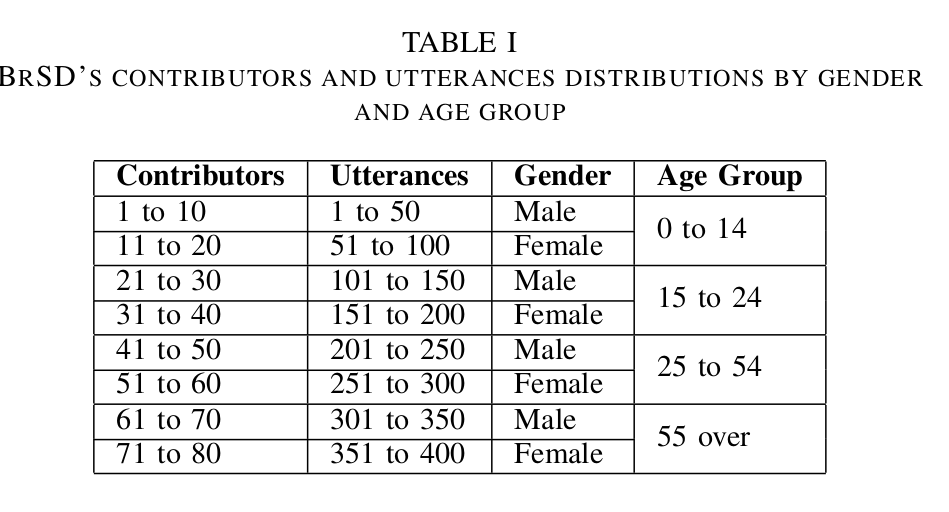

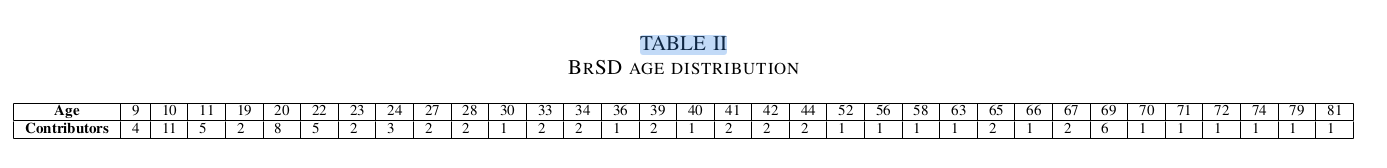

Paper que usa o [Common Voice](https://doi.org/10.3390/s21175892)

In [37]:
df_train['age'].unique()

array(['twenties', 'fourties', 'thirties', 'fifties', 'sixties', 'teens',
       'seventies', 'eighties', 'nineties'], dtype=object)

In [36]:
# teens = 20 pessoas (0 - 14)
# twenties, thirties,fourties,  = 40 (15 - 24 / 25 - 54 )
# fifties, sixties,seventies, eighties  = 10 (55 over)


# -----------------------------------------------
# 

,path,sentence,age,gender
client_id,,,,
00015e9c3555dafee96d32f38408877b6c33cc7668c5c75206317e926702b5b64accf29bf8456f9a09efa720bc42b8cd4589e5abc289ce6e2fb96050433c0c93,common_voice_en_22070204.mp3,"Kira later apologises to Sisko, and agrees wit...",twenties,male
00015e9c3555dafee96d32f38408877b6c33cc7668c5c75206317e926702b5b64accf29bf8456f9a09efa720bc42b8cd4589e5abc289ce6e2fb96050433c0c93,common_voice_en_22070407.mp3,Reverend Jackson found his major life's work i...,twenties,male
00015e9c3555dafee96d32f38408877b6c33cc7668c5c75206317e926702b5b64accf29bf8456f9a09efa720bc42b8cd4589e5abc289ce6e2fb96050433c0c93,common_voice_en_22070408.mp3,Some sources include a rival gang of Norse mer...,twenties,male
00015e9c3555dafee96d32f38408877b6c33cc7668c5c75206317e926702b5b64accf29bf8456f9a09efa720bc42b8cd4589e5abc289ce6e2fb96050433c0c93,common_voice_en_22070413.mp3,Spain is a multi-party constitutional parliame...,twenties,male
00015e9c3555dafee96d32f38408877b6c33cc7668c5c75206317e926702b5b64accf29bf8456f9a09efa720bc42b8cd4589e5abc289ce6e2fb96050433c0c93,common_voice_en_22070416.mp3,It is also a Site of Special Scientific Interest.,twenties,male
...,...,...,...,...
fff6abe14e96800a3a5a2a06e4eedf0368834b7703f00cd0652f78d74d6a3f42f71440833692c33ad33c22472e19c0bb2892e889786789af1143e403fee05da3,common_voice_en_24986106.mp3,It leaves a white streak.,fifties,male
fff6abe14e96800a3a5a2a06e4eedf0368834b7703f00cd0652f78d74d6a3f42f71440833692c33ad33c22472e19c0bb2892e889786789af1143e403fee05da3,common_voice_en_24986110.mp3,The language is taught in primary schools and ...,fifties,male
fff6abe14e96800a3a5a2a06e4eedf0368834b7703f00cd0652f78d74d6a3f42f71440833692c33ad33c22472e19c0bb2892e889786789af1143e403fee05da3,common_voice_en_24986114.mp3,Another one is cytoplasmic dynein which facili...,fifties,male
